In [ ]:
root = "\Malware_Classification\dataRaw"

In [ ]:

import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier


## Importation des Donnée

In [ ]:
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 25 classes.


We can see that our 25 classes have been well recognized (thanks to our subfolders). Let's clarify this using the dictionnary.

In [ ]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

**batches** generated with ImageDataGenerator() is an iterator. Hence, we use next() to go through all its elements and generate a batch of images and labels from the data set.

In [ ]:
imgs, labels = next(batches)


In [ ]:
imgs[1].shape

(64, 64, 3)

As you can see, our images are in RGB with shape 64x64 [width x length x depth].

In [ ]:
imgs.shape

(9339, 64, 64, 3)

**labels** has the shape (batch_size, number of classes).

In [ ]:
labels.shape

(9339, 25)

The following method allows us to plot a sample of images in our dataset.

In [ ]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

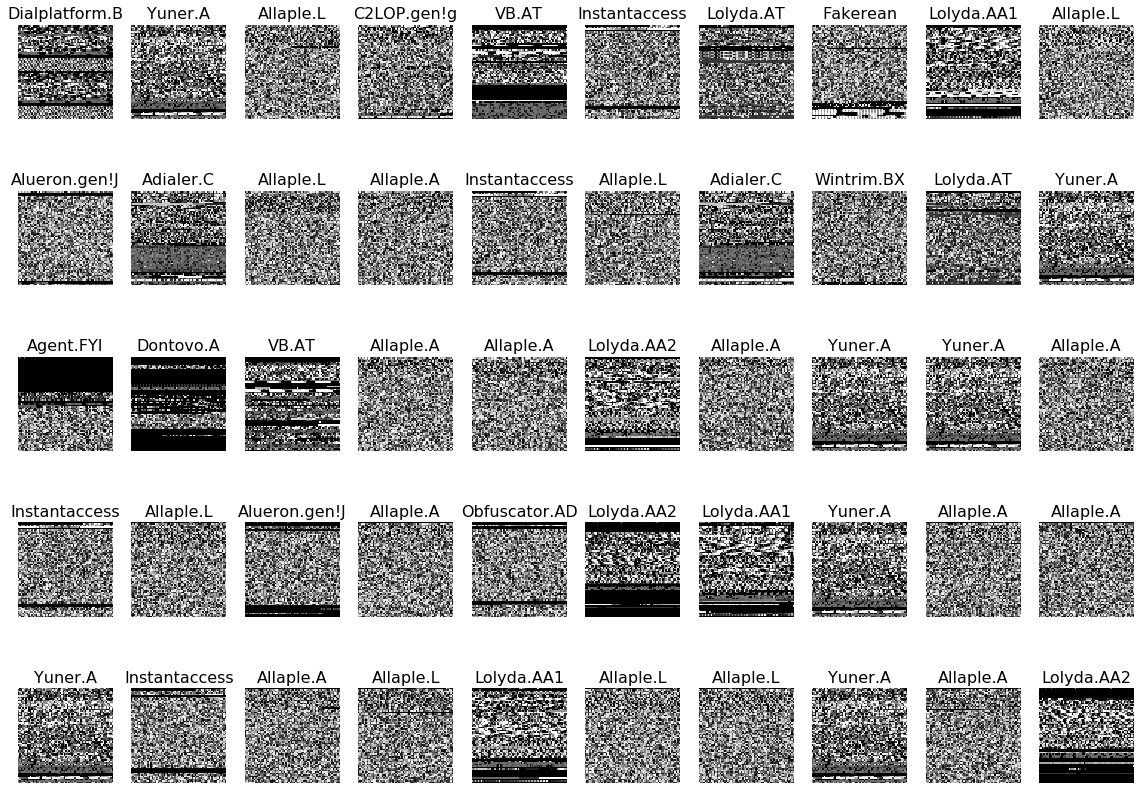

In [ ]:
plots(imgs, titles = labels)

We can already observe differences between classes.

# Analyse des données

All our images are finally ready to be used. Lets check out the repartition of data between classes :

In [ ]:
classes = batches.class_indices.keys()

In [ ]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

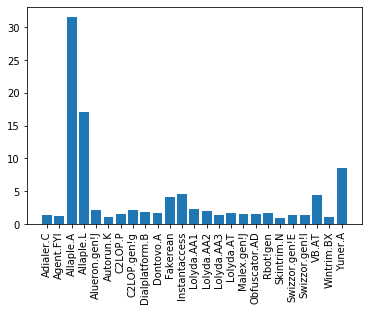

In [ ]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

We can see that our dataset is quite unbalanced : a lot of Malwares belong to class 2 : **Allaple.A** and class 3 : **Allaple.L** !
We will need to deal with that later. 

# Train and test

Lets split our model into train and test following a ratio 70% train - 30% test ratio.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

Building the model

In [ ]:
X_train_flattened = np.array([X_train_i.ravel() for X_train_i in X_train])
X_test_flattened = np.array([X_test_i.ravel() for X_test_i in X_test])


## Models de Machine learning

#### MLP

In [ ]:
##############Neural network model##########################
############################################################

input_shape = X_train_flattened[0].shape

model = Sequential()
model.add(Dense(1000, input_shape= input_shape, activation='sigmoid')) #1000 neurone in the first hiden layer 

model.add(Dense(1000, activation='sigmoid'))  
# model.add(Dropout(0.3))

model.add(Dense(1000, activation='sigmoid'))  

model.add(Dense(1000, activation='sigmoid'))  

model.add(Dense(25, activation='softmax')) 



model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy']) #Learning the parameters

model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 1000)              12289000  
_________________________________________________________________
dense_148 (Dense)            (None, 1000)              1001000   
_________________________________________________________________
dense_149 (Dense)            (None, 1000)              1001000   
_________________________________________________________________
dense_150 (Dense)            (None, 1000)              1001000   
_________________________________________________________________
dense_151 (Dense)            (None, 25)                25025     
Total params: 15,317,025
Trainable params: 15,317,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_flattened, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test_flattened,y_test))


Train on 6537 samples, validate on 2802 samples
Epoch 1/10
6537/6537 [==============================] - 53s 8ms/step - loss: 0.1065 - accuracy: 0.9652 - val_loss: 0.0838 - val_accuracy: 0.9769
Epoch 2/10
6537/6537 [==============================] - 40s 6ms/step - loss: 0.0771 - accuracy: 0.9758 - val_loss: 0.0640 - val_accuracy: 0.9799
Epoch 3/10
6537/6537 [==============================] - 39s 6ms/step - loss: 0.0706 - accuracy: 0.9782 - val_loss: 0.0597 - val_accuracy: 0.9820
Epoch 4/10
6537/6537 [==============================] - 38s 6ms/step - loss: 0.0585 - accuracy: 0.9824 - val_loss: 0.0604 - val_accuracy: 0.9821
Epoch 5/10
6537/6537 [==============================] - 37s 6ms/step - loss: 0.0573 - accuracy: 0.9819 - val_loss: 0.0435 - val_accuracy: 0.9871
Epoch 6/10
6537/6537 [==============================] - 38s 6ms/step - loss: 0.0514 - accuracy: 0.9838 - val_loss: 0.0861 - val_accuracy: 0.9725
Epoch 7/10
6537/6537 [==============================] - 38s 6ms/step - loss: 0.075

#### More advenced way to comput score

In [ ]:

f1_score(y_test, model.predict(X_test_flattened), average='macro')

## Random forest

In [ ]:
y_train_new = np.where(y_train==1)[1]
y_test_new = np.where(y_test==1)[1]

In [ ]:
RFC = RandomForestClassifier()

RFC.fit(X_train_flattened, y_train_new)


C:\Users\Amine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
f1_score(y_test_new, RFC.predict(X_test_flattened), average='macro')

0.8691494279312607

## Logistic regression

In [ ]:
lgr = LogisticRegression()

lgr.fit(X_train_flattened, y_train_new)

C:\Users\Amine\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amine\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
f1_score(y_test_new, lgr.predict(X_test_flattened), average='macro')

0.8751213335910148

## Convolution nural network

In [ ]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [ ]:
Malware_model = malware_model()

In [ ]:
Malware_model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 30)        840       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 30)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 15)        4065      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 15)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 15)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2940)              0         
_________________________________________________________________
dense_144 (Dense)            (None, 128)             

Several methods are available to deal with unbalanced data. I our case, I chose to give higher weight to minority class and lower weight to majority class. 

**class_weights** uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data. To use this method, y_train must not be one hot encoded.

In [ ]:
y_train.shape

(6537, 25)

**class_weight** function cannot deal with one hot encoded y. We need to convert it.

In [ ]:
y_train_new = np.argmax(y_train, axis=1)

In [ ]:
y_train_new

array([ 5,  2, 10, ...,  3, 11,  3], dtype=int64)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train_new),
                                                 y_train_new)


In [ ]:
np.argmax(class_weights)

19

In [ ]:
Malware_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,  class_weight=class_weights)

Train on 6537 samples, validate on 2802 samples
Epoch 1/10
6537/6537 [==============================] - 41s 6ms/step - loss: 0.1752 - accuracy: 0.9436 - val_loss: 0.1097 - val_accuracy: 0.9629
Epoch 2/10
6537/6537 [==============================] - 40s 6ms/step - loss: 0.1510 - accuracy: 0.9494 - val_loss: 0.0802 - val_accuracy: 0.9739
Epoch 3/10
6537/6537 [==============================] - 41s 6ms/step - loss: 0.1443 - accuracy: 0.9520 - val_loss: 0.0830 - val_accuracy: 0.9718
Epoch 4/10
6537/6537 [==============================] - 42s 6ms/step - loss: 0.1317 - accuracy: 0.9562 - val_loss: 0.0876 - val_accuracy: 0.9750
Epoch 5/10
6537/6537 [==============================] - 43s 7ms/step - loss: 0.1242 - accuracy: 0.9584 - val_loss: 0.0825 - val_accuracy: 0.9750
Epoch 6/10
6537/6537 [==============================] - 42s 6ms/step - loss: 0.1264 - accuracy: 0.9575 - val_loss: 0.0872 - val_accuracy: 0.9700
Epoch 7/10
6537/6537 [==============================] - 46s 7ms/step - loss: 0.122

In [ ]:
scores = Malware_model.evaluate(X_test, y_test)

2802/2802 [==============================] - 9s 3ms/step


We got a 95% accuracy which is not bad !

In [ ]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.9561027884483337


# Confusion Matrix

Lets analyse our results.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
y_pred = Malware_model.predict_classes(X_test, verbose=0)

In [ ]:
y_pred

array([ 2,  2, 13, ...,  2,  3,  7], dtype=int64)

In [ ]:
y_test2 = np.argmax(y_test, axis=1)

In [ ]:
y_test2

array([ 2,  2, 13, ...,  2,  3,  7], dtype=int64)

In [ ]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test2, y_pred)

In [ ]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

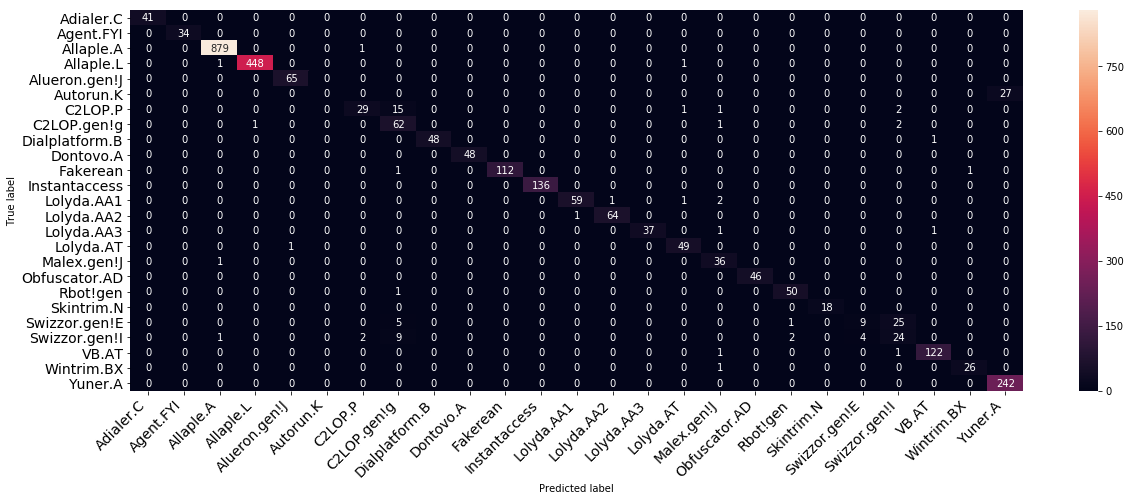

In [ ]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)

Here is our confusion matrix. We can observe that although most of the malwares were well classified, **Autorun.K** is always mistaken for **Yuner.A**. This is probably due to the fact that we have very few samples of **Autorun.K** in our training set. Moreover, **Swizzor.gen!E** is often mistaken with **Swizzor.gen!l**, which can be explained by the fact that they come from really close famillies and thus could have similarities in their code.